#comando para transformar dados em .grib2 para netcdf no terminal

cdo -f nc copy prate.03.2024021500.daily.grb2 preci_20240215.nc


cdo sinfo preci_20240215.nc

https://cfs.ncep.noaa.gov/cfsv2/downloads.html


https://nomads.ncep.noaa.gov/pub/data/nccf/com/cfs/prod/


In [1]:

import xarray as xr

arquivo= 'preci_20240215.nc'
ds = xr.open_dataset(arquivo)
ds


/home/casamentos/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<xarray.Dataset>
Dimensions:  (time: 428, lon: 384, lat: 190)
Coordinates:
  * time     (time) datetime64[ns] 2024-02-15T06:00:00 ... 2024-06-01
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * lat      (lat) float64 89.28 88.34 87.4 86.45 ... -86.45 -87.4 -88.34 -89.28
Data variables:
    prate    (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Feb 16 20:44:49 2024: cdo -f nc copy prate.03.202402150...
    institution:  National Centers for Environmental Prediction
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [2]:
#converter longitude de forma correta
ds.coords['lon'] = ((ds.coords['lon'] + 180) % 360) - 180
ds = ds.sortby(ds.lon)
ds

<xarray.Dataset>
Dimensions:  (time: 428, lat: 190, lon: 384)
Coordinates:
  * time     (time) datetime64[ns] 2024-02-15T06:00:00 ... 2024-06-01
  * lat      (lat) float64 89.28 88.34 87.4 86.45 ... -86.45 -87.4 -88.34 -89.28
  * lon      (lon) float64 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1
Data variables:
    prate    (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Feb 16 20:44:49 2024: cdo -f nc copy prate.03.202402150...
    institution:  National Centers for Environmental Prediction
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [3]:
#verificar as datas no arquivo
ds.time.data

array(['2024-02-15T06:00:00.000000000', '2024-02-15T12:00:00.000000000',
       '2024-02-15T18:00:00.000000000', '2024-02-16T00:00:00.000000000',
       '2024-02-16T06:00:00.000000000', '2024-02-16T12:00:00.000000000',
       '2024-02-16T18:00:00.000000000', '2024-02-17T00:00:00.000000000',
       '2024-02-17T06:00:00.000000000', '2024-02-17T12:00:00.000000000',
       '2024-02-17T18:00:00.000000000', '2024-02-18T00:00:00.000000000',
       '2024-02-18T06:00:00.000000000', '2024-02-18T12:00:00.000000000',
       '2024-02-18T18:00:00.000000000', '2024-02-19T00:00:00.000000000',
       '2024-02-19T06:00:00.000000000', '2024-02-19T12:00:00.000000000',
       '2024-02-19T18:00:00.000000000', '2024-02-20T00:00:00.000000000',
       '2024-02-20T06:00:00.000000000', '2024-02-20T12:00:00.000000000',
       '2024-02-20T18:00:00.000000000', '2024-02-21T00:00:00.000000000',
       '2024-02-21T06:00:00.000000000', '2024-02-21T12:00:00.000000000',
       '2024-02-21T18:00:00.000000000', '2024-02-22

In [6]:
#selecionar a área que eu quero, caso eu queira as datas
ds_corte = ds.sel(time = slice('2024-01-01', '2024-07-30')).sel(lat = slice(-15,-30), lon = slice(-55,-38))
#latitude do maior para o menor

In [7]:

#cálculo da chuva mensal, quero agrupar os dados, que vem horária
ds_mensal = ds_corte.groupby('time.month').sum(dim = 'time')

In [8]:
ds_mensal

<xarray.Dataset>
Dimensions:  (lat: 16, month: 5, lon: 18)
Coordinates:
  * lat      (lat) float64 -15.59 -16.54 -17.48 -18.43 ... -27.87 -28.82 -29.76
  * lon      (lon) float64 -54.38 -53.44 -52.5 -51.56 ... -40.31 -39.38 -38.44
  * month    (month) int64 2 3 4 5 6
Data variables:
    prate    (month, lat, lon) float32 0.004522 0.005039 ... 1e-06 2e-06
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Feb 16 20:44:49 2024: cdo -f nc copy prate.03.202402150...
    institution:  National Centers for Environmental Prediction
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [9]:
prec_total_mes =ds_mensal['prate']


In [10]:
prec_total_mes

<xarray.DataArray 'prate' (month: 5, lat: 16, lon: 18)>
array([[[4.5220004e-03, 5.0389995e-03, 3.9589996e-03, ...,
         4.6859989e-03, 3.4990006e-03, 3.6320002e-03],
        [3.9060002e-03, 3.5190003e-03, 4.4459999e-03, ...,
         4.0279995e-03, 1.8060002e-03, 2.1279999e-03],
        [4.0079998e-03, 4.3960004e-03, 6.0620001e-03, ...,
         3.0449999e-03, 1.4770000e-03, 1.2630001e-03],
        ...,
        [3.1870003e-03, 2.7010005e-03, 2.0490002e-03, ...,
         2.2420001e-03, 2.9500001e-03, 5.1709991e-03],
        [2.0500002e-03, 2.2380003e-03, 2.7580003e-03, ...,
         3.7310002e-03, 3.4979996e-03, 4.9429992e-03],
        [2.0180002e-03, 2.2710003e-03, 2.5850004e-03, ...,
         4.7539999e-03, 4.4859997e-03, 5.3909998e-03]],

       [[9.8470012e-03, 8.2579982e-03, 8.6339992e-03, ...,
         5.0899978e-03, 4.1600005e-03, 5.9549999e-03],
        [8.5719991e-03, 4.7600004e-03, 7.0289997e-03, ...,
         6.3199992e-03, 4.2750011e-03, 8.4389998e-03],
        [6.7119994e-03, 7.3149987e-03, 9.4360001e-03, ...,
         6.2260004e-03, 5.5279997e-03, 7.9889996e-03],
...
        [1.7840001e-03, 1.8540001e-03, 1.6860001e-03, ...,
         4.9180002e-03, 4.7459998e-03, 4.8610005e-03],
        [1.9930003e-03, 1.8070003e-03, 1.6490001e-03, ...,
         6.6620000e-03, 6.3440003e-03, 5.8680004e-03],
        [3.1750000e-03, 3.2210001e-03, 2.8230001e-03, ...,
         5.7250005e-03, 5.9099998e-03, 5.9020002e-03]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 1.0000000e-06],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 1.0000000e-06],
        ...,
        [2.5700001e-04, 9.6999996e-05, 4.5000001e-05, ...,
         2.0000000e-06, 2.0000000e-06, 1.0000000e-06],
        [1.5800000e-04, 5.8000001e-05, 2.8000000e-05, ...,
         1.0000000e-06, 3.0000001e-06, 4.0000000e-06],
        [1.2000000e-05, 8.0000000e-06, 4.0000000e-06, ...,
         1.0000000e-06, 1.0000000e-06, 2.0000000e-06]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -15.59 -16.54 -17.48 -18.43 ... -27.87 -28.82 -29.76
  * lon      (lon) float64 -54.38 -53.44 -52.5 -51.56 ... -40.31 -39.38 -38.44
  * month    (month) int64 2 3 4 5 6
Attributes:
    long_name:    Precipitation rate
    units:        kg m**-2 s**-1
    param:        7.1.0
    institution:  NCEP

In [11]:
#só do mês 1
prec_total_mes[0]

<xarray.DataArray 'prate' (lat: 16, lon: 18)>
array([[0.004522, 0.005039, 0.003959, 0.004813, 0.004029, 0.008298,
        0.008064, 0.006774, 0.007205, 0.006269, 0.005142, 0.003073,
        0.004602, 0.00431 , 0.005445, 0.004686, 0.003499, 0.003632],
       [0.003906, 0.003519, 0.004446, 0.007269, 0.010695, 0.010521,
        0.006924, 0.006222, 0.005279, 0.004991, 0.003955, 0.004952,
        0.006513, 0.005697, 0.005857, 0.004028, 0.001806, 0.002128],
       [0.004008, 0.004396, 0.006062, 0.008703, 0.011619, 0.007674,
        0.005474, 0.004261, 0.004463, 0.004665, 0.006762, 0.007008,
        0.006366, 0.004135, 0.004634, 0.003045, 0.001477, 0.001263],
       [0.005563, 0.00681 , 0.006667, 0.006545, 0.004974, 0.004481,
        0.004408, 0.004043, 0.00582 , 0.006497, 0.008103, 0.007709,
        0.00663 , 0.003767, 0.003443, 0.004422, 0.002848, 0.001047],
       [0.00645 , 0.006381, 0.005288, 0.003688, 0.004241, 0.00503 ,
        0.005897, 0.005928, 0.006275, 0.005264, 0.005262, 0.007051,
        0.006683, 0.005864, 0.004793, 0.005964, 0.005807, 0.003162],
       [0.006181, 0.008921, 0.006428, 0.004797, 0.005382, 0.007297,
        0.008861, 0.008831, 0.007518, 0.007214, 0.009182, 0.010507,
        0.011358, 0.008888, 0.004206, 0.00554 , 0.007658, 0.010084],
       [0.005184, 0.007141, 0.006266, 0.004799, 0.009572, 0.011866,
        0.011075, 0.010044, 0.010242, 0.010921, 0.013123, 0.013414,
...
        0.004919, 0.00508 , 0.005776, 0.007745, 0.010878, 0.0075  ],
       [0.006496, 0.009135, 0.010736, 0.009408, 0.005598, 0.008044,
        0.010377, 0.008298, 0.005271, 0.003436, 0.003915, 0.005557,
        0.006455, 0.007548, 0.008851, 0.011261, 0.007865, 0.009815],
       [0.004864, 0.006021, 0.006483, 0.00374 , 0.003019, 0.005274,
        0.005006, 0.005378, 0.005251, 0.005696, 0.006024, 0.007755,
        0.009914, 0.007715, 0.006748, 0.007239, 0.007054, 0.010057],
       [0.003281, 0.00304 , 0.002902, 0.001965, 0.002917, 0.004716,
        0.003916, 0.00445 , 0.003939, 0.003796, 0.004094, 0.005348,
        0.005606, 0.005049, 0.003273, 0.002849, 0.006705, 0.008589],
       [0.003187, 0.002701, 0.002049, 0.002239, 0.004368, 0.0068  ,
        0.005737, 0.003898, 0.002329, 0.002217, 0.002936, 0.002173,
        0.002383, 0.0037  , 0.002787, 0.002242, 0.00295 , 0.005171],
       [0.00205 , 0.002238, 0.002758, 0.003791, 0.005242, 0.006847,
        0.007021, 0.003355, 0.002142, 0.003307, 0.002125, 0.001762,
        0.002407, 0.003402, 0.003909, 0.003731, 0.003498, 0.004943],
       [0.002018, 0.002271, 0.002585, 0.002654, 0.002921, 0.004303,
        0.005174, 0.002574, 0.001457, 0.001883, 0.002476, 0.002014,
        0.001899, 0.002899, 0.004834, 0.004754, 0.004486, 0.005391]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -15.59 -16.54 -17.48 -18.43 ... -27.87 -28.82 -29.76
  * lon      (lon) float64 -54.38 -53.44 -52.5 -51.56 ... -40.31 -39.38 -38.44
    month    int64 2
Attributes:
    long_name:    Precipitation rate
    units:        kg m**-2 s**-1
    param:        7.1.0
    institution:  NCEP

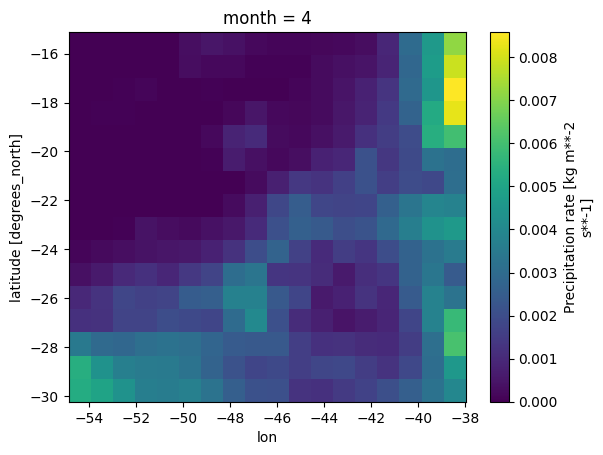

In [12]:
#só do mês 1
prec_total_mes[2].plot()

In [13]:
#para auxiliar o plot do mês de forma escrita
mon_list_name = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']


In [14]:
print(prec_total_mes[2].month.data)

4


0
2
Fevereiro

1
3
Março

2
4
Abril

3
5
Maio



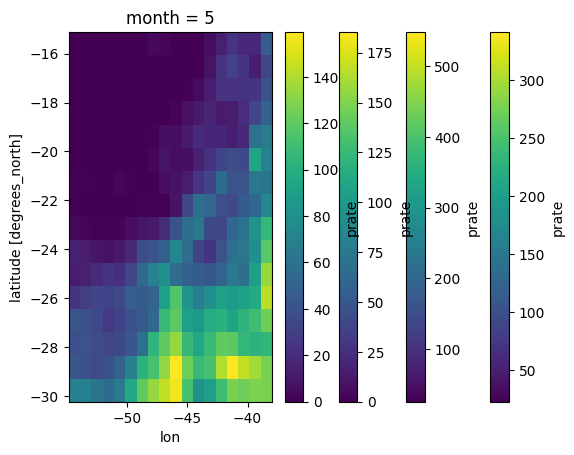

In [16]:
for j in range(4):
    print(j)
    #coleta o número do mês do arquivo
    numero= prec_total_mes[j].month.data
    print(numero)
    print(mon_list_name[numero-1])
    (prec_total_mes[j]*60*60*6).plot()
    print()
    

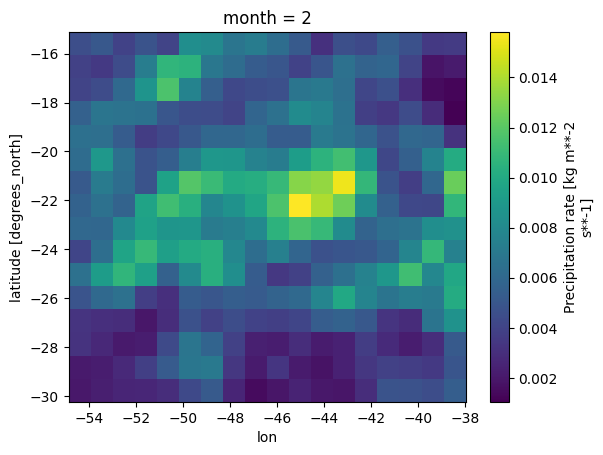

In [17]:
prec_total_mes[0].plot()

In [23]:
#60X60X24=86400 seconds in one day.Para um dia
# 1 kg/m2/s = 86400 mm/day.
# kg m**-2 s**-1 
# neste caso é 6 horas, então multiplica por 6 em vez de 24 horas

#Considering that this would be an enormous amount of rain in a day by any standard, perhaps 1 kg/m2/s
#could be in reality 1 kg/m2/year, or per month, or per day. 1 kg/m2 is always 1 mm of rain.

#1 kg/m^2/sec = 1000 gm / (100cm)^2 /sec
#= 1000 cm^3/(10000cm^2)/sec (1 cubic cm volume of water is 1 gm of water)
#=1 cm/10/sec
#=10 mm/10/sec
#=1 mm/sec (86400 sec= 1 day, i.e. 1 sec= 1/86400 day)
#= 1 mm /(1/86400)day
#=86400 mm/day

#1 mm = 1 liter/ m2
#1 liter = 1 kg
#1 hr = 3600 s
#3600 s x 24 hr (1 day) = 86400 s
#To convert the precipitation of [kg/(m2 . s)] into (mm/day); we need to multiply 86400.
#cdo mulc,86400 input.nc output.nc


0
2
Fevereiro


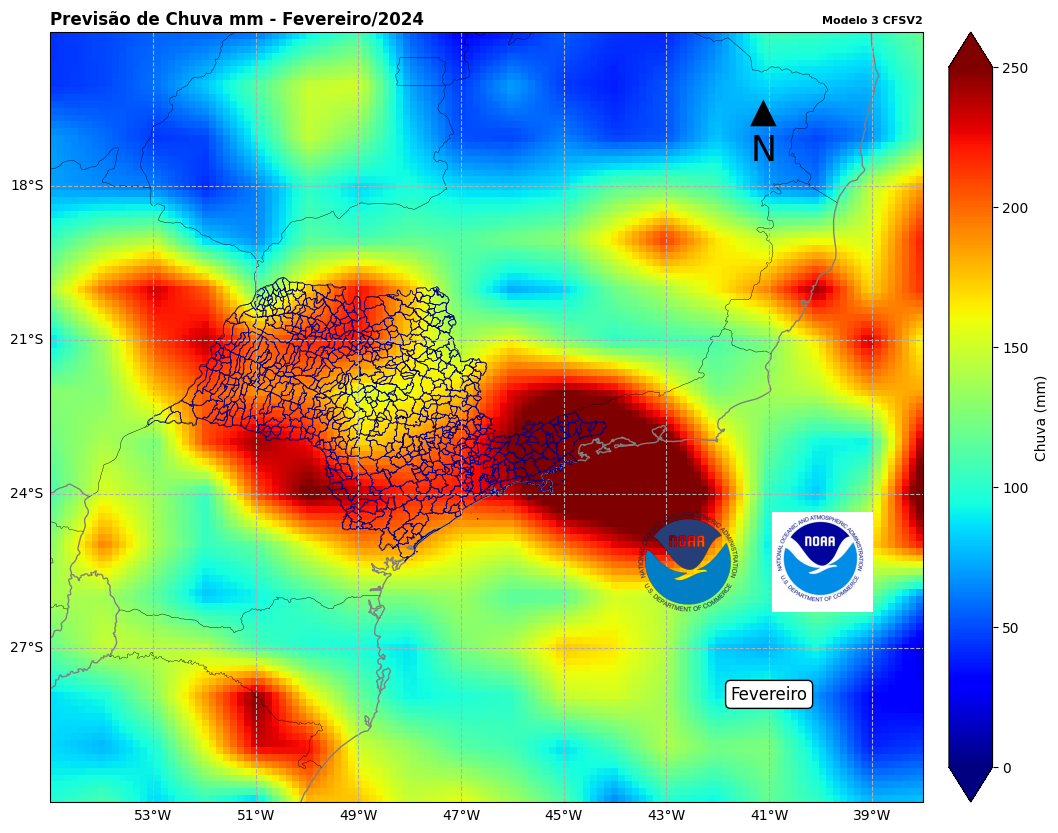

1
3
Março


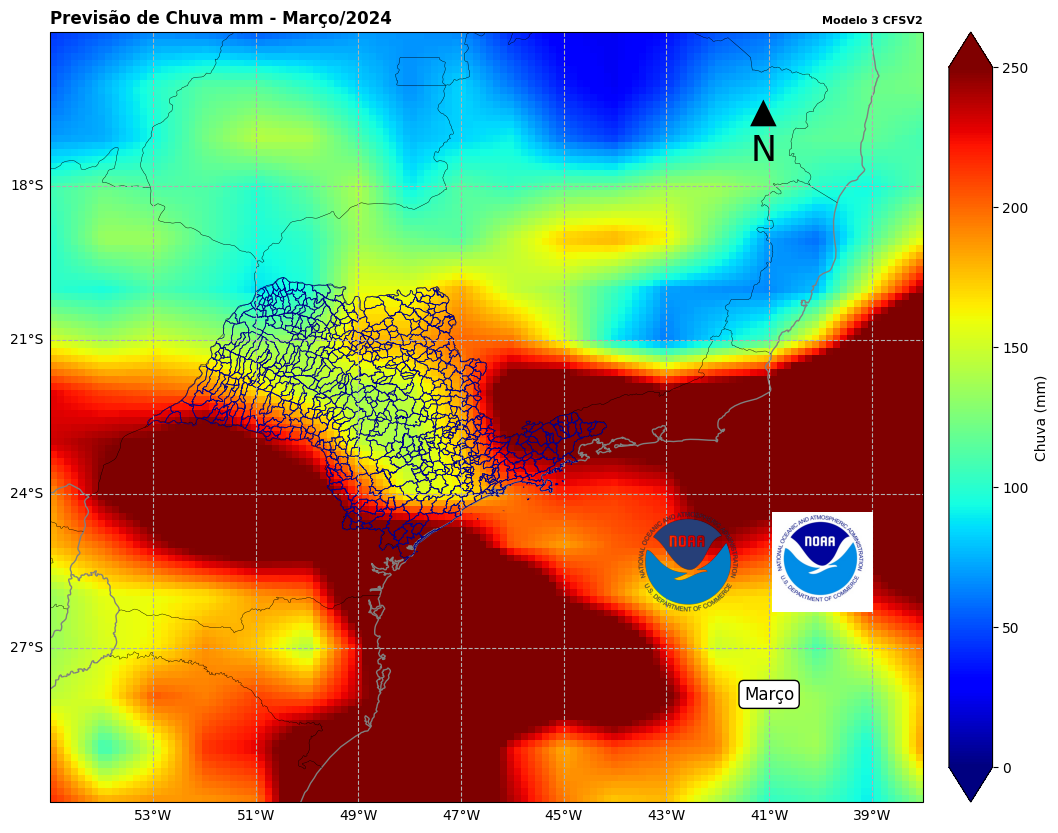

2
4
Abril


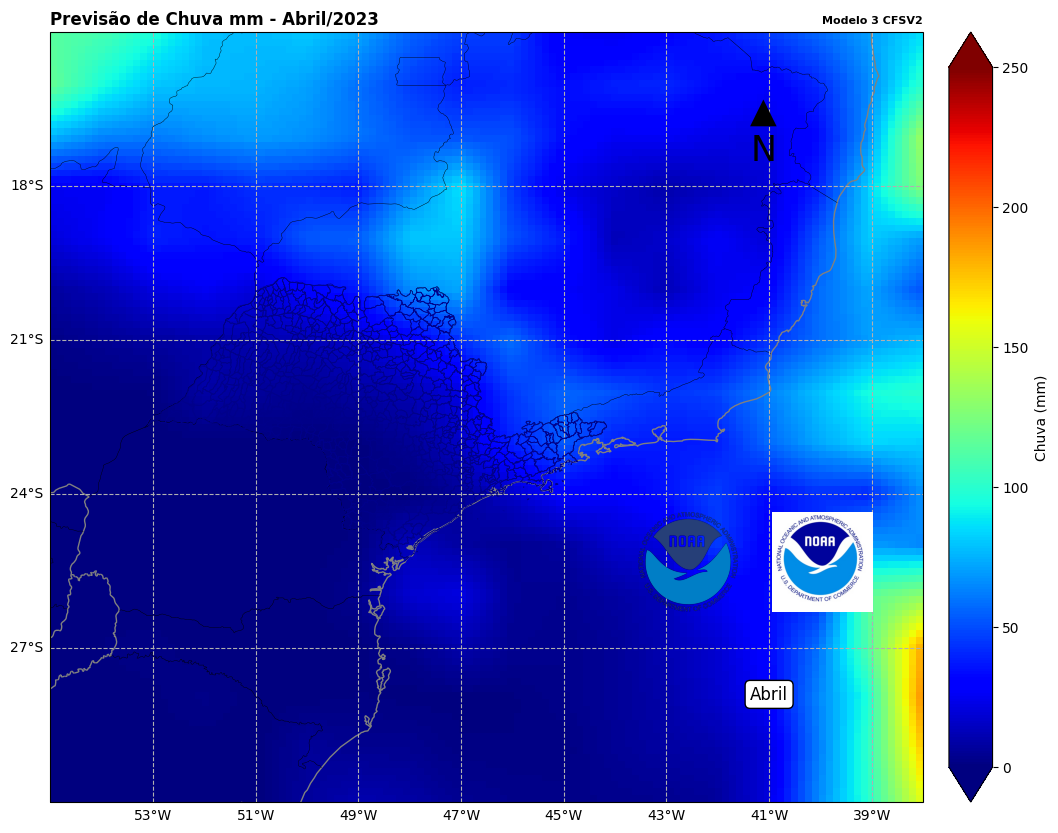

3
5
Maio


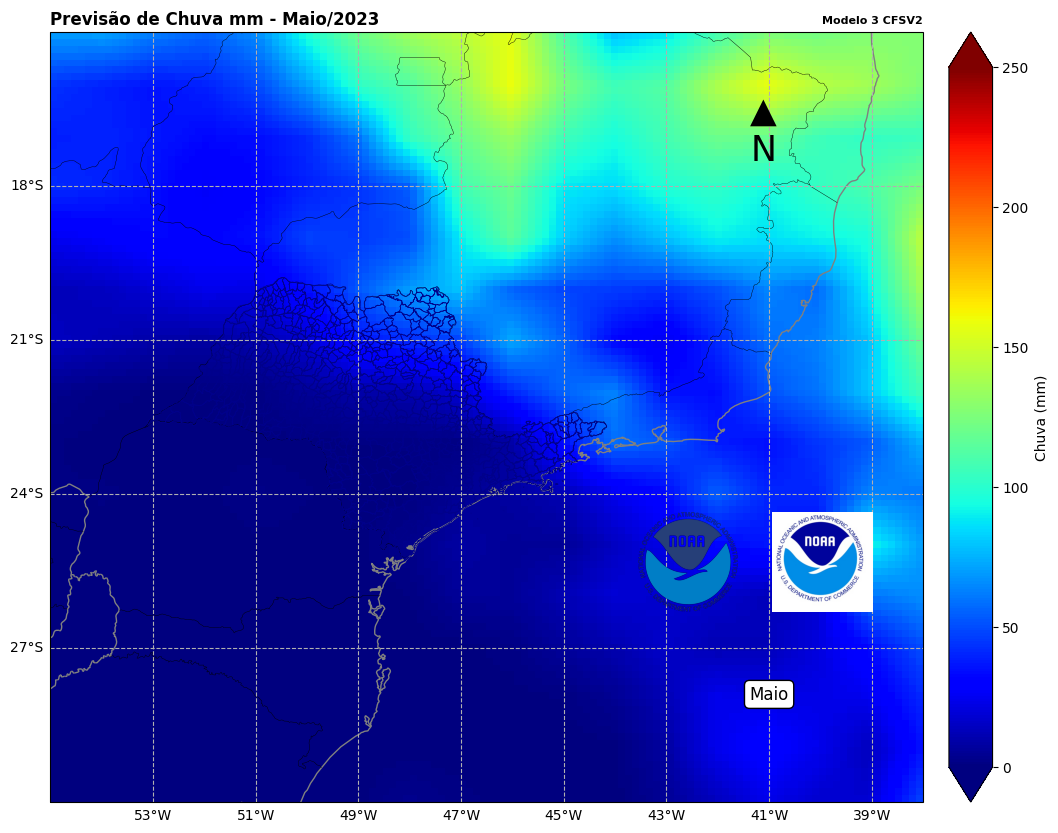

4
6
Junho


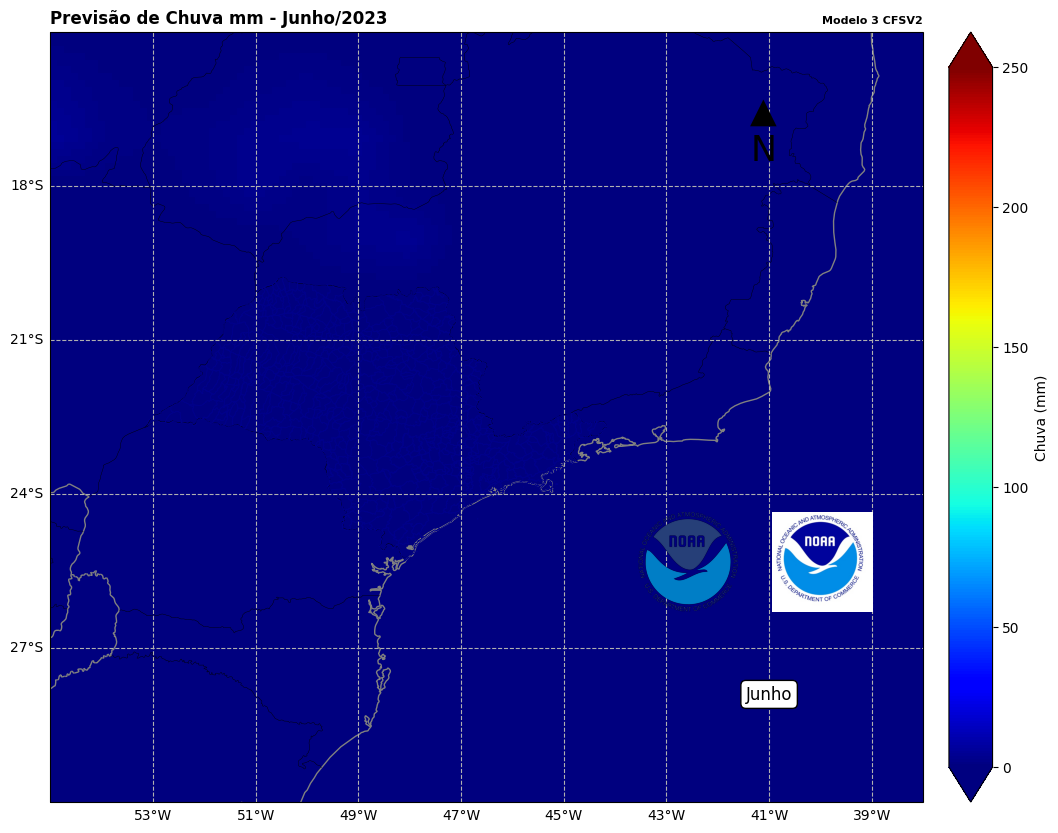

In [19]:
for j in range(5):
    print(j)
    numero= prec_total_mes[j].month.data
    print(numero)
    print(mon_list_name[numero-1])
    
    mes_escrito= mon_list_name[numero-1]
    
    
    ano ='2024'
    
    if j >1:
        ano='2023'
    
    import numpy as np



    # Assuming 'lat' and 'lon' are the dimension names, replace them with your actual dimension names
    new_lon = np.linspace(prec_total_mes[j].lon[0], prec_total_mes[j].lon[-1], prec_total_mes[j].sizes["lon"] * 7)
    new_lat = np.linspace(prec_total_mes[j].lat[0], prec_total_mes[j].lat[-1], prec_total_mes[j].sizes["lat"] * 7)


    # Use dimension names instead of string indices
    NEW_prec_total_mes = prec_total_mes[j].interp(lat=new_lat, lon=new_lon)

    #Mapa de interesse
    
    
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature
    import cartopy.io.shapereader as shpreader  # Import shapefiles

    # Assume NEW_anom_corte_SP é o seu dado de anomalia de chuva

    # Configura o tamanho do plot
    fig = plt.figure(figsize=(15, 10))

    # Define a projeção
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Adiciona linha de costa, terra, borda
    ax.coastlines(resolution='10m', color='grey')
    ax.add_feature(cartopy.feature.LAND, facecolor='silver')
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray')

    # Define a área do plot
    limites = [-55, -38, -30, -15]
    ax.set_extent(limites, crs=ccrs.PlateCarree())

    # Adicionando o dado (assuming NEW_anom_corte_SP is the rainfall anomaly data)
    im = ax.imshow(NEW_prec_total_mes*60*60*6, origin='lower', extent=limites, vmin=0, vmax=250, cmap='jet')

    # Adicionando título
    plt.title(f'Previsão de Chuva mm - {mes_escrito}/{ano}', fontweight='bold', loc='left')
    plt.title('Modelo 3 CFSV2', fontweight='bold', fontsize=8, loc='right')

    # Adicionando os limites dos estados
    shapefile_path = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces_lines')
    shapefile = shpreader.Reader(shapefile_path).geometries()
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

    shapefile = list(shpreader.Reader('SP_municipios/SP_Municipios_2022.shp').geometries())
    #ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='darkblue',facecolor='none', linewidth=0.5)

    # Configuração das grades
    gl = ax.gridlines(linestyle='--', xlocs=np.arange(-55, -38, 2), ylocs=np.arange(-30, -15, 3), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False


    # Adicionando a barra de cor
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    

    

    axins = inset_axes(ax, width="5%", height="100%", loc='right', borderpad=-5)
    cbar = fig.colorbar(im, cax=axins, orientation='vertical', label='Chuva (mm)', extend='both')
    
    # North Arrow
    ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-41, -17.5))
    
    # Data box
    box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    ax.annotate(mes_escrito, ha='center', fontsize=12, xy=(-41, -28), bbox=box)

    #plt.savefig(f'figuras_plot_cfsvw/chuva_cfs_modelo3{i}.png',bbox_inches='tight', dpi=100)
    # Mostra o plot
    im_log1 = plt.imread(("loginho.jpg"))

    #MEXER NAS POSIÇÕES 1 = Y 2 = Y (menor mais para baixo), 3 X (maior mais para o lado)

    newax = fig.add_axes([0.42,0.3,0.35,0.1], anchor='NE',zorder=0)
    #newax = fig.add_axes([-0.1,0.5,0.5,0.3], anchor='NE', zorder=1)

    newax.imshow(im_log1)
    
    
    im_log2=plt.imread(("1024px-NOAA_logo.svg.png"))
    #MEXER NAS POSIÇÕES 1 = Y 2 = Y (menor mais para baixo), 3 X (maior mais para o lado)

    newax1 = fig.add_axes([0.33,0.3,0.35,0.1], anchor='NE',zorder=0)
    #newax = fig.add_axes([-0.1,0.5,0.5,0.3], anchor='NE', zorder=1)

    newax1.imshow(im_log2)    
    
   # plt.savefig(f'chuva_cfs_modelo3{j}.png',bbox_inches='tight', dpi=100)

   #    
    newax.axis('off') 
    newax1.axis('off') 
    plt.savefig(f'Figuras_CFSV2_GRIB/chuva_cfs_modelo3{j}.png',bbox_inches='tight', dpi=100)
    plt.show()




0
2
Fevereiro


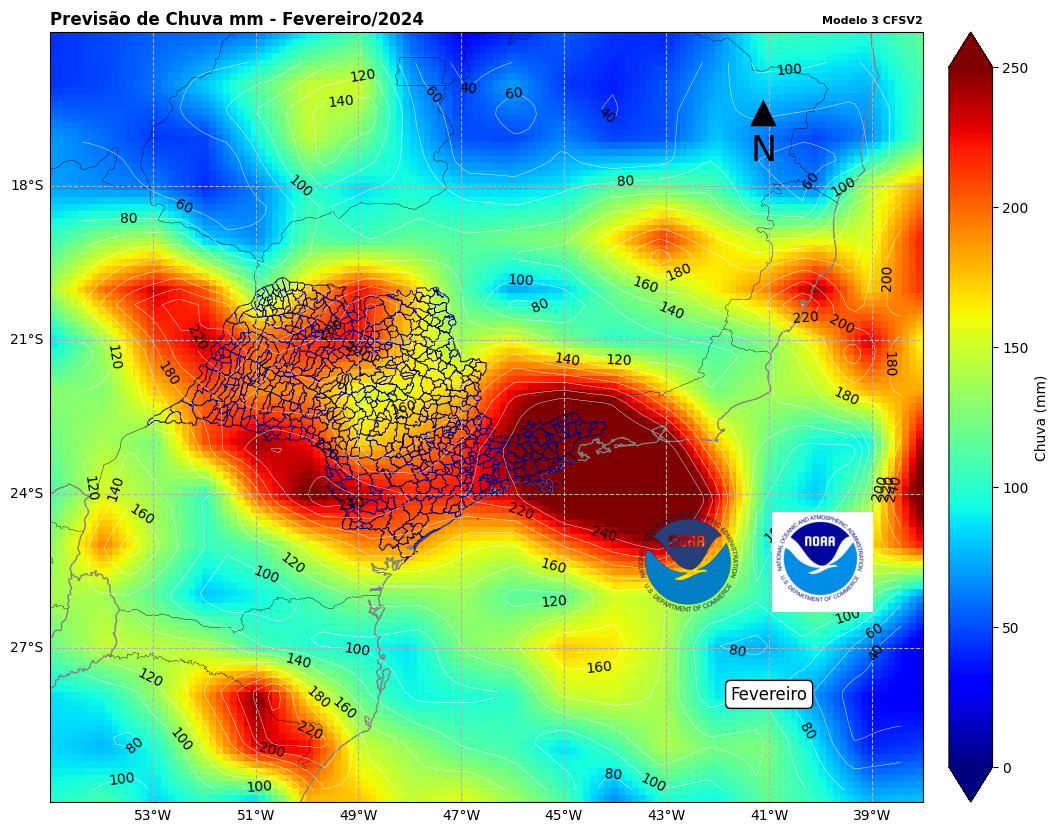

1
3
Março


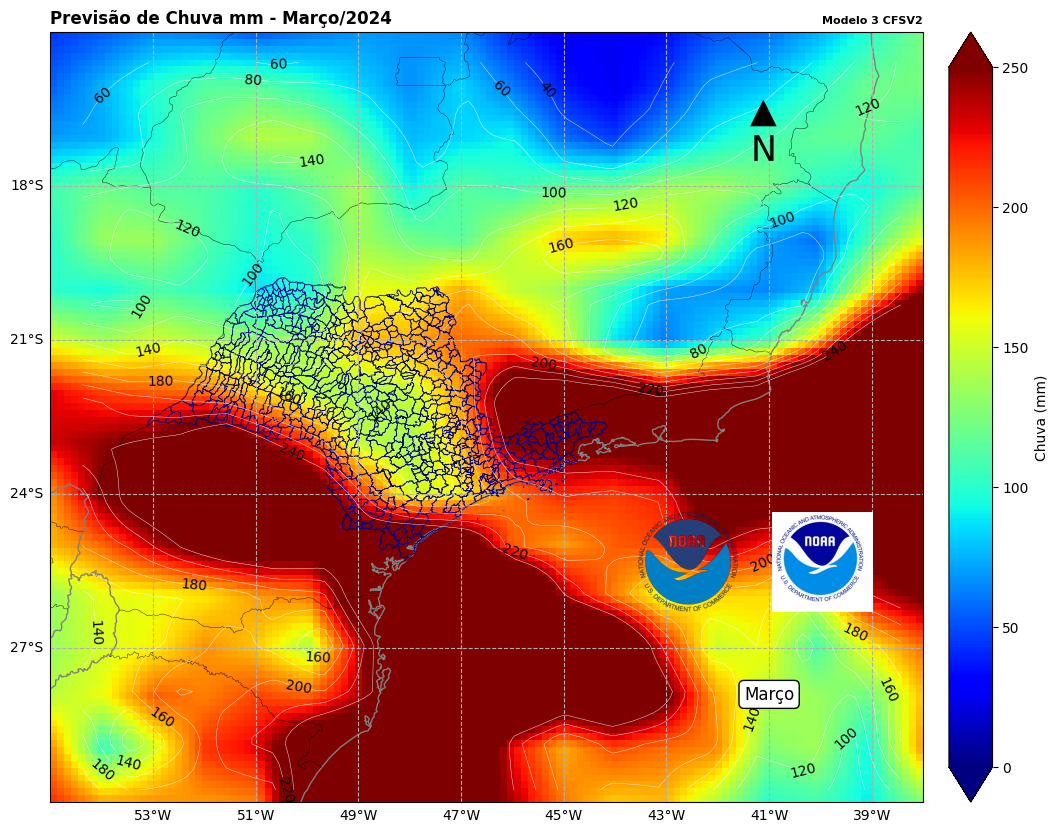

2
4
Abril


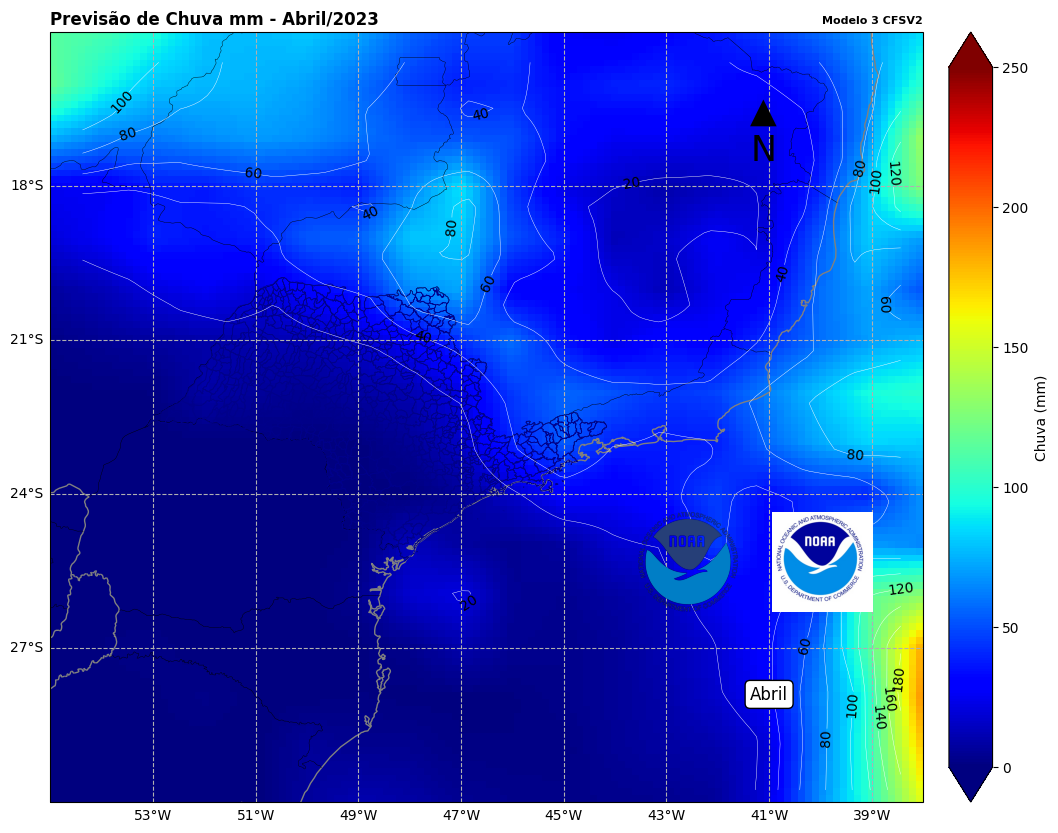

3
5
Maio


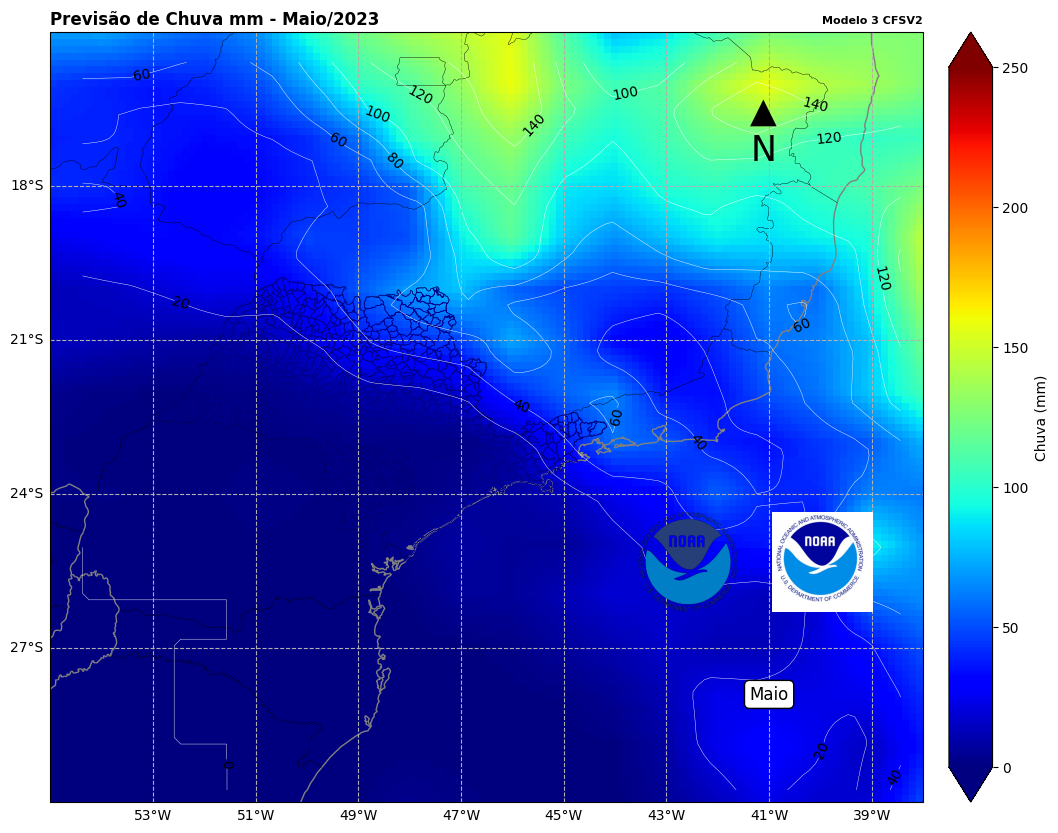

In [20]:

for j in range(4):
    print(j)
    numero= prec_total_mes[j].month.data
    print(numero)
    print(mon_list_name[numero-1])
    
    mes_escrito= mon_list_name[numero-1]
    
    
    ano ='2024'
    
    if j >1:
        ano='2023'
    
    import numpy as np



    # Assuming 'lat' and 'lon' are the dimension names, replace them with your actual dimension names
    new_lon = np.linspace(prec_total_mes[j].lon[0], prec_total_mes[j].lon[-1], prec_total_mes[j].sizes["lon"] * 7)
    new_lat = np.linspace(prec_total_mes[j].lat[0], prec_total_mes[j].lat[-1], prec_total_mes[j].sizes["lat"] * 7)


    # Use dimension names instead of string indices
    NEW_prec_total_mes = prec_total_mes[j].interp(lat=new_lat, lon=new_lon)

    #Mapa de interesse
    
    
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature
    import cartopy.io.shapereader as shpreader  # Import shapefiles

    # Assume NEW_anom_corte_SP é o seu dado de anomalia de chuva

    # Configura o tamanho do plot
    fig = plt.figure(figsize=(15, 10))

    # Define a projeção
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Adiciona linha de costa, terra, borda
    ax.coastlines(resolution='10m', color='grey')
    ax.add_feature(cartopy.feature.LAND, facecolor='silver')
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray')

    # Define a área do plot
    limites = [-55, -38, -30, -15]
    ax.set_extent(limites, crs=ccrs.PlateCarree())
    #novo plot
 #-----------------------------------------calculo plotagem
    NEW_prec_total_mes0= NEW_prec_total_mes*60*60*6
    
     # Adjust the contour levels based on the data range
    # Plot the image
    img1 = ax.imshow(NEW_prec_total_mes0, origin='lower', extent=limites, vmin=0, vmax=250, cmap='jet')

    # Define contour levels
    data_min = 0
    data_max = 250
    interval = 20
    levels = np.arange(data_min, data_max, interval)

    
    lons, lats = np.meshgrid(NEW_prec_total_mes0.lon, NEW_prec_total_mes0.lat)
    # Plot contours on top of the image
   # contour = ax.contour(lons, lats, NEW_prec_total_mes0, colors='white', linewidths=0.3, levels=levels)
  #  ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    # Plot contours on top of the image
    #contour = ax.contour(lons, lats, NEW_prec_total_mes0, colors='white', linewidths=0.3, levels=levels, origin='lower')
    #ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    # Plot contours on top of the image
    #contorno havia ficado antes de ponta cabeça
    contour = ax.contour(lons, lats, NEW_prec_total_mes0[::-1, :], colors='white', linewidths=0.3, levels=levels, origin='lower')
    ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    
#--------------------------------------------------------------------------------------------------------    

    # Adicionando título
    plt.title(f'Previsão de Chuva mm - {mes_escrito}/{ano}', fontweight='bold', loc='left')
    plt.title('Modelo 3 CFSV2', fontweight='bold', fontsize=8, loc='right')

    # Adicionando os limites dos estados
    shapefile_path = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces_lines')
    shapefile = shpreader.Reader(shapefile_path).geometries()
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

    shapefile = list(shpreader.Reader('SP_municipios/SP_Municipios_2022.shp').geometries())
    #ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='darkblue',facecolor='none', linewidth=0.5)

    # Configuração das grades
    gl = ax.gridlines(linestyle='--', xlocs=np.arange(-55, -38, 2), ylocs=np.arange(-30, -15, 3), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False


    # Adicionando a barra de cor
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    

    

    axins = inset_axes(ax, width="5%", height="100%", loc='right', borderpad=-5)
   # cbar = fig.colorbar(im, cax=axins, orientation='vertical', label='Chuva (mm)', extend='both')
    cbar = fig.colorbar(img1, cax=axins, orientation='vertical', label='Chuva (mm)', extend='both')
    
    # North Arrow
    ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-41, -17.5))
    
    # Data box
    box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    ax.annotate(mes_escrito, ha='center', fontsize=12, xy=(-41, -28), bbox=box)
#------------------logo----------------------------
    #plt.savefig(f'figuras_plot_cfsvw/chuva_cfs_modelo3{i}.png',bbox_inches='tight', dpi=100)
    # Mostra o plot
    im_log1 = plt.imread(("loginho.jpg"))

    #MEXER NAS POSIÇÕES 1 = Y 2 = Y (menor mais para baixo), 3 X (maior mais para o lado)

    newax = fig.add_axes([0.42,0.3,0.35,0.1], anchor='NE',zorder=0)
    #newax = fig.add_axes([-0.1,0.5,0.5,0.3], anchor='NE', zorder=1)

    newax.imshow(im_log1)
    
    
    im_log2=plt.imread(("1024px-NOAA_logo.svg.png"))
    #MEXER NAS POSIÇÕES 1 = Y 2 = Y (menor mais para baixo), 3 X (maior mais para o lado)

    newax1 = fig.add_axes([0.33,0.3,0.35,0.1], anchor='NE',zorder=0)
    #newax = fig.add_axes([-0.1,0.5,0.5,0.3], anchor='NE', zorder=1)

    newax1.imshow(im_log2)    
    
   # plt.savefig(f'chuva_cfs_modelo3{j}.png',bbox_inches='tight', dpi=100)

   #    
    newax.axis('off') 
    newax1.axis('off') 




    plt.savefig(f'Figuras_CFSV2_GRIB/chuva_cfs_modelo3_contorno{j}.png',bbox_inches='tight', dpi=100)

    plt.show()
    

0
2
Fevereiro
1
3
Março
2
4
Abril
3
5
Maio


/tmp/ipykernel_7704/1478711507.py:148: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


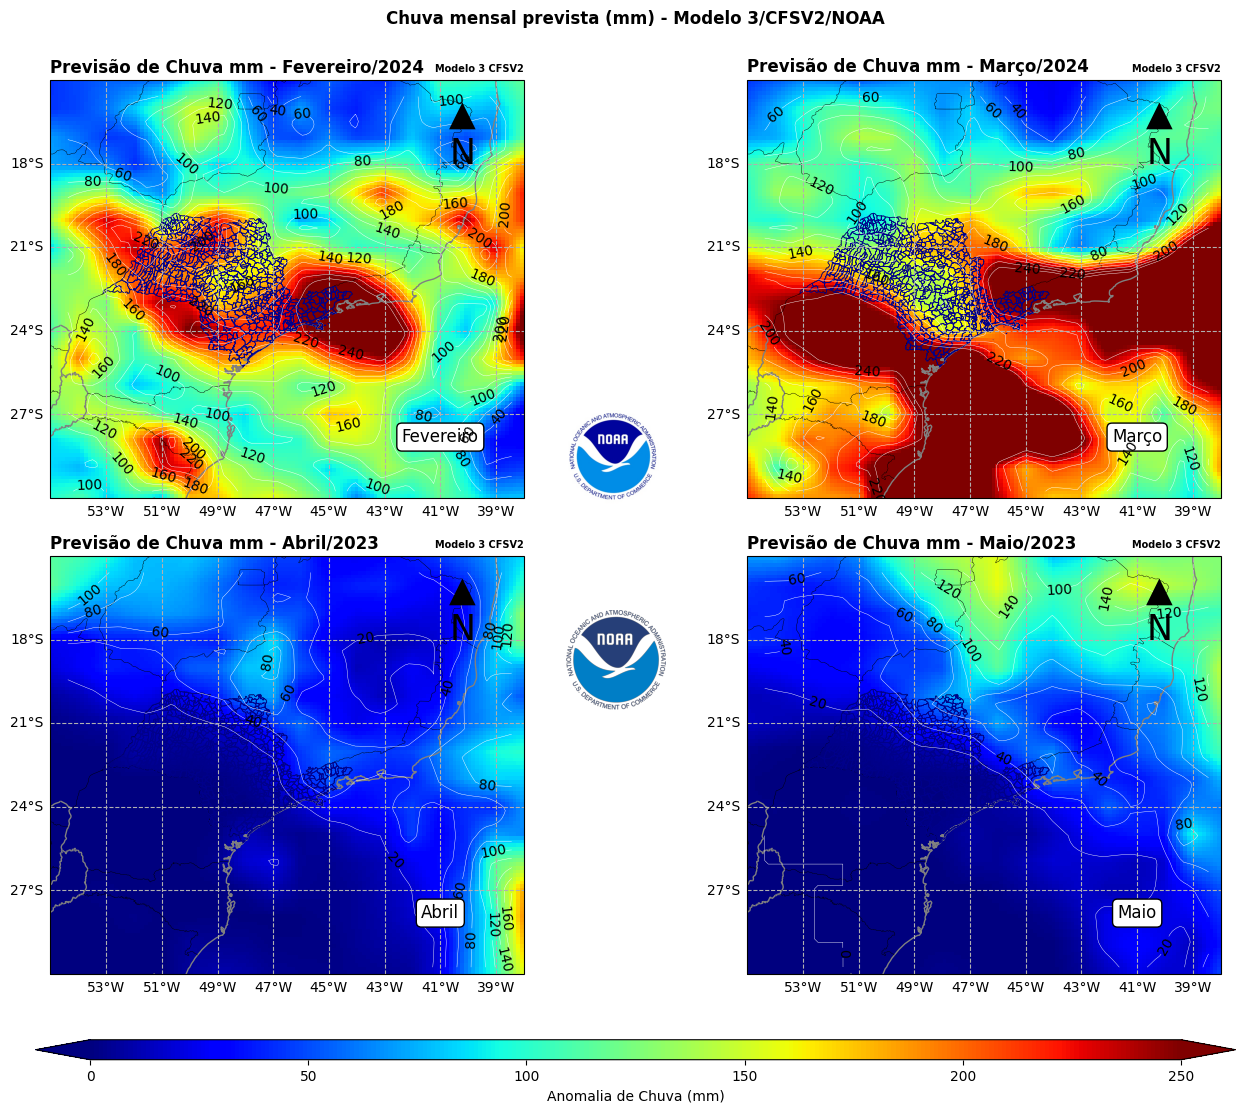

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature
import cartopy.io.shapereader as shpreader

# Create a subplot grid
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))


#fig, axs = plt.subplots(nrows=2,ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(24,17))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()
for j, ax in enumerate(axes):
#for j in range(4):
    print(j)
    numero= prec_total_mes[j].month.data
    print(numero)
    print(mon_list_name[numero-1])
    
    mes_escrito= mon_list_name[numero-1]
    
    
    ano ='2024'
    
    if j >1:
        ano='2023'
    
    import numpy as np



    # Assuming 'lat' and 'lon' are the dimension names, replace them with your actual dimension names
    new_lon = np.linspace(prec_total_mes[j].lon[0], prec_total_mes[j].lon[-1], prec_total_mes[j].sizes["lon"] * 7)
    new_lat = np.linspace(prec_total_mes[j].lat[0], prec_total_mes[j].lat[-1], prec_total_mes[j].sizes["lat"] * 7)


    # Use dimension names instead of string indices
    NEW_prec_total_mes = prec_total_mes[j].interp(lat=new_lat, lon=new_lon)

    #Mapa de interesse
    
    
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature
    import cartopy.io.shapereader as shpreader  # Import shapefiles

    # Assume NEW_anom_corte_SP é o seu dado de anomalia de chuva

    # Adiciona linha de costa, terra, borda
    ax.coastlines(resolution='10m', color='grey')
    ax.add_feature(cartopy.feature.LAND, facecolor='silver')
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray')

    # Define a área do plot
    limites = [-55, -38, -30, -15]
    ax.set_extent(limites, crs=ccrs.PlateCarree())
    #novo plot
 #-----------------------------------------calculo plotagem
    NEW_prec_total_mes0= NEW_prec_total_mes*60*60*6
    
     # Adjust the contour levels based on the data range
    # Plot the image
    img1 = ax.imshow(NEW_prec_total_mes0, origin='lower', extent=limites, vmin=0, vmax=250, cmap='jet')

    # Define contour levels
    data_min = 0
    data_max = 250
    interval = 20
    levels = np.arange(data_min, data_max, interval)

    
    lons, lats = np.meshgrid(NEW_prec_total_mes0.lon, NEW_prec_total_mes0.lat)
    # Plot contours on top of the image
   # contour = ax.contour(lons, lats, NEW_prec_total_mes0, colors='white', linewidths=0.3, levels=levels)
  #  ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    # Plot contours on top of the image
    #contour = ax.contour(lons, lats, NEW_prec_total_mes0, colors='white', linewidths=0.3, levels=levels, origin='lower')
    #ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    # Plot contours on top of the image
    #contorno havia ficado antes de ponta cabeça
    contour = ax.contour(lons, lats, NEW_prec_total_mes0[::-1, :], colors='white', linewidths=0.3, levels=levels, origin='lower')
    ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    
#--------------------------------------------------------------------------------------------------------    

    # Adicionando título
    ax.set_title(f'Previsão de Chuva mm - {mes_escrito}/{ano}', fontweight='bold', loc='left')
    ax.set_title('Modelo 3 CFSV2', fontweight='bold', fontsize=7, loc='right')

    # Adicionando os limites dos estados
    shapefile_path = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces_lines')
    shapefile = shpreader.Reader(shapefile_path).geometries()
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

    shapefile = list(shpreader.Reader('SP_municipios/SP_Municipios_2022.shp').geometries())
    #ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='darkblue',facecolor='none', linewidth=0.5)

    # Configuração das grades
    gl = ax.gridlines(linestyle='--', xlocs=np.arange(-55, -38, 2), ylocs=np.arange(-30, -15, 3), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False


    # North Arrow
    ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-40, -18.0))
    
    # Data box
    box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    ax.annotate(mes_escrito, ha='center', fontsize=12, xy=(-41, -28), bbox=box)
        
#------------------logo----------------------------
    
# Mostra o plot
im_log1 = plt.imread(("loginho.jpg"))

#MEXER NAS POSIÇÕES 1 = Y 2 = Y (menor mais para baixo), 3 X (maior mais para o lado)
newax = fig.add_axes([0.17,0.5,0.35,0.1], anchor='NE',zorder=0)
newax.imshow(im_log1)
    
    
im_log2=plt.imread(("1024px-NOAA_logo.svg.png"))
#MEXER NAS POSIÇÕES 1 = Y 2 = Y (menor mais para baixo), 3 X (maior mais para o lado)

newax1 = fig.add_axes([0.17,0.3,0.35,0.1], anchor='NE',zorder=0)
newax1.imshow(im_log2)    
    

#    
newax.axis('off') 
newax1.axis('off') 


fig.suptitle('Chuva mensal prevista (mm) - Modelo 3/CFSV2/NOAA',fontweight='bold', y=1.0)    
# Adiciona a barra de cor (assumindo que você já tem a variável im definida)
cax = fig.add_axes([0.1, -0.05, 0.8, 0.02])
#cax = fig.add_axes([0.2, -0.05, 0.6, 0.02])  # Adjust the position and size as needed

#[left, bottom, width, height]
cbar = fig.colorbar(im, cax=cax, orientation='horizontal', label='Anomalia de Chuva (mm)', extend='both')    
    

    #plt.savefig(f'chuva_cfs_modelo3_contorno{j}.png',bbox_inches='tight', dpi=100)
# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.savefig(f'Figuras_CFSV2_GRIB/chuva_cfs_modelo3_contorno_quadro.png',bbox_inches='tight', dpi=100)
# Show the combined plot
plt.show()

0
2
Fevereiro
1
3
Março
2
4
Abril
3
5
Maio


/tmp/ipykernel_7704/480681618.py:139: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


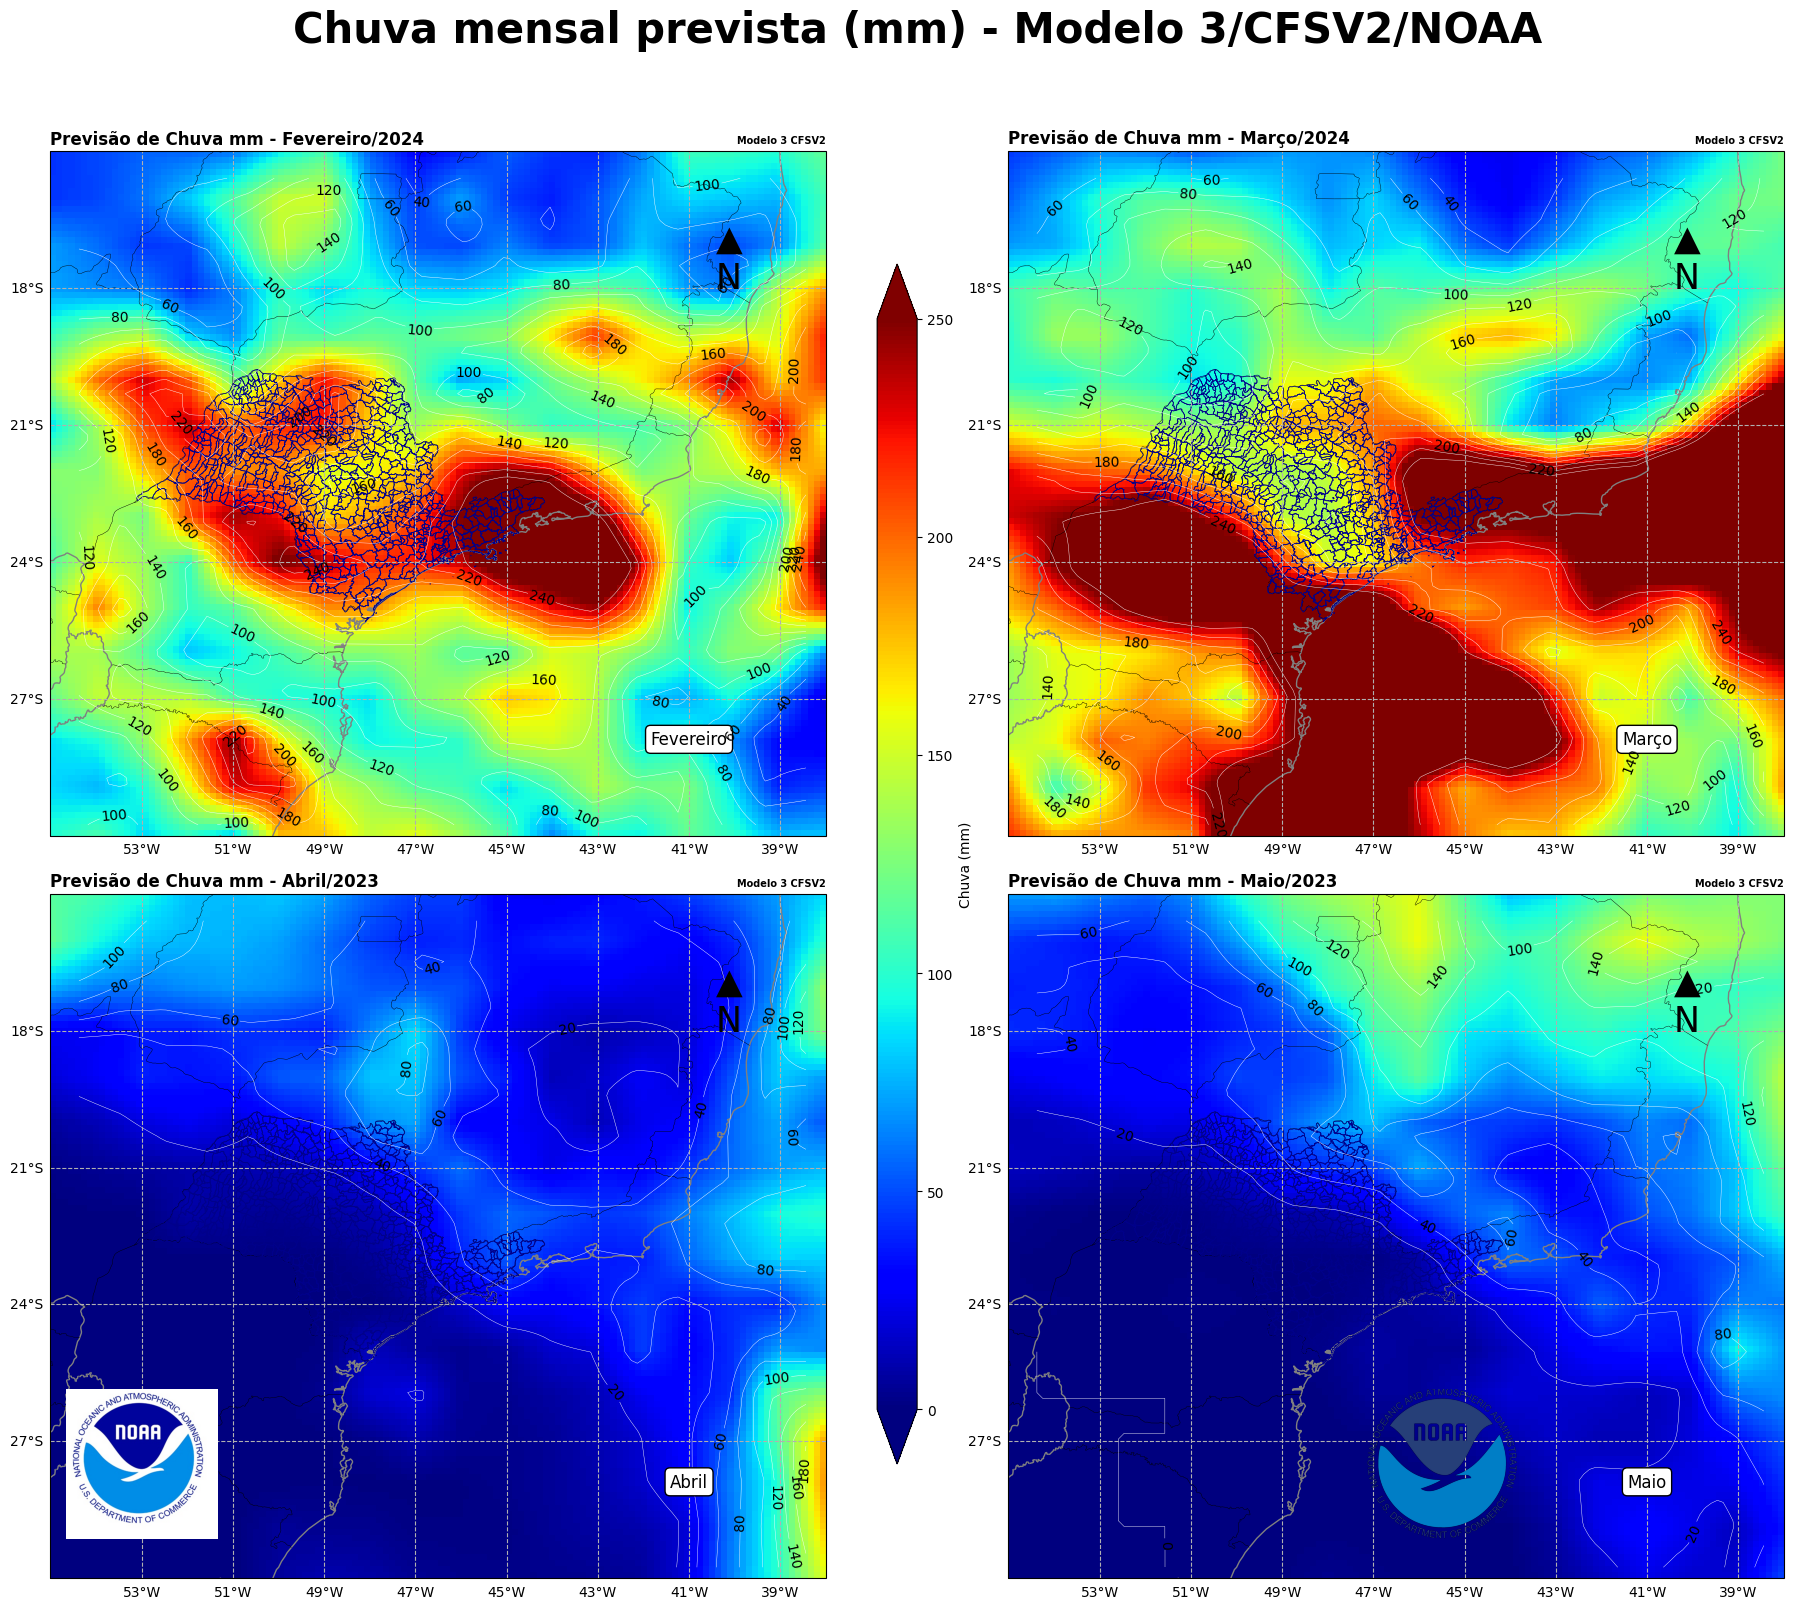

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature
import cartopy.io.shapereader as shpreader

# Create a subplot grid
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))


#fig, axs = plt.subplots(nrows=2,ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(24,17))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()
for j, ax in enumerate(axes):
#for j in range(4):
    print(j)
    numero= prec_total_mes[j].month.data
    print(numero)
    print(mon_list_name[numero-1])
    
    mes_escrito= mon_list_name[numero-1]
    
    
    ano ='2024'
    
    if j >1:
        ano='2023'
    
    import numpy as np



    # Assuming 'lat' and 'lon' are the dimension names, replace them with your actual dimension names
    new_lon = np.linspace(prec_total_mes[j].lon[0], prec_total_mes[j].lon[-1], prec_total_mes[j].sizes["lon"] * 7)
    new_lat = np.linspace(prec_total_mes[j].lat[0], prec_total_mes[j].lat[-1], prec_total_mes[j].sizes["lat"] * 7)


    # Use dimension names instead of string indices
    NEW_prec_total_mes = prec_total_mes[j].interp(lat=new_lat, lon=new_lon)

    #Mapa de interesse
    
    
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature
    import cartopy.io.shapereader as shpreader  # Import shapefiles

    # Assume NEW_anom_corte_SP é o seu dado de anomalia de chuva

    # Adiciona linha de costa, terra, borda
    ax.coastlines(resolution='10m', color='grey')
    ax.add_feature(cartopy.feature.LAND, facecolor='silver')
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray')

    # Define a área do plot
    limites = [-55, -38, -30, -15]
    ax.set_extent(limites, crs=ccrs.PlateCarree())
    #novo plot
 #-----------------------------------------calculo plotagem
    NEW_prec_total_mes0= NEW_prec_total_mes*60*60*6
    
     # Adjust the contour levels based on the data range
    # Plot the image
    img1 = ax.imshow(NEW_prec_total_mes0, origin='lower', extent=limites, vmin=0, vmax=250, cmap='jet')

    # Define contour levels
    data_min = 0
    data_max = 250
    interval = 20
    levels = np.arange(data_min, data_max, interval)

    
    lons, lats = np.meshgrid(NEW_prec_total_mes0.lon, NEW_prec_total_mes0.lat)
    # Plot contours on top of the image
   # contour = ax.contour(lons, lats, NEW_prec_total_mes0, colors='white', linewidths=0.3, levels=levels)
  #  ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    # Plot contours on top of the image
    #contour = ax.contour(lons, lats, NEW_prec_total_mes0, colors='white', linewidths=0.3, levels=levels, origin='lower')
    #ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    # Plot contours on top of the image
    #contorno havia ficado antes de ponta cabeça
    contour = ax.contour(lons, lats, NEW_prec_total_mes0[::-1, :], colors='white', linewidths=0.3, levels=levels, origin='lower')
    ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    
#--------------------------------------------------------------------------------------------------------    

    # Adicionando título
    ax.set_title(f'Previsão de Chuva mm - {mes_escrito}/{ano}', fontweight='bold', loc='left')
    ax.set_title('Modelo 3 CFSV2', fontweight='bold', fontsize=7, loc='right')

    # Adicionando os limites dos estados
    shapefile_path = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces_lines')
    shapefile = shpreader.Reader(shapefile_path).geometries()
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

    shapefile = list(shpreader.Reader('SP_municipios/SP_Municipios_2022.shp').geometries())
    #ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='darkblue',facecolor='none', linewidth=0.5)

    # Configuração das grades
    gl = ax.gridlines(linestyle='--', xlocs=np.arange(-55, -38, 2), ylocs=np.arange(-30, -15, 3), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False


    # North Arrow
    ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-40, -18.0))
    
    # Data box
    box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    ax.annotate(mes_escrito, ha='center', fontsize=12, xy=(-41, -28), bbox=box)
        
#------------------logo----------------------------
    
# Mostra o plot
im_log1 = plt.imread(("loginho.jpg"))

#MEXER NAS POSIÇÕES 1 = Y 2 = Y (menor mais para baixo), 3 X (maior mais para o lado)
newax = fig.add_axes([-0.2,0.05,0.35,0.1], anchor='NE',zorder=0)
newax.imshow(im_log1)
    
    
im_log2=plt.imread(("1024px-NOAA_logo.svg.png"))
#MEXER NAS POSIÇÕES 1 = Y 2 = Y (menor mais para baixo), 3 X (maior mais para o lado)

newax1 = fig.add_axes([0.45,0.05,0.35,0.1], anchor='NE',zorder=0)
newax1.imshow(im_log2)    
    

#    
newax.axis('off') 
newax1.axis('off') 



# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Create a colorbar below the subplots
#cax = fig.add_axes([0.2, -0.05, 0.6, 0.02])  # Adjust the position and size as needed


# Create a vertical colorbar to the right of the subplots
cax = fig.add_axes([0.48, 0.1, 0.02, 0.8])  # Adjust the position and size as needed
#cax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  # Adjust the position and size as needed
# Increase the font size of colorbar labels
cbar.ax.tick_params(labelsize=75)  # Adjust the font size as needed

cbar = fig.colorbar(img1, cax=cax, orientation='vertical', label='Chuva (mm)', extend='both')

# Add a title to the entire figure
fig.suptitle('Chuva mensal prevista (mm) - Modelo 3/CFSV2/NOAA', fontweight='bold', fontsize=30, y=1.07)

# Save the figure
plt.savefig(f'Figuras_CFSV2_GRIB/chuva_cfs_modelo3_contorno_quadro2.png', bbox_inches='tight', dpi=100)

# Show the combined plot
plt.show()